<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Thoughts-on-Numeric-Data:" data-toc-modified-id="Thoughts-on-Numeric-Data:-0.0.1">Thoughts on Numeric Data:</a></span></li><li><span><a href="#Thoughts-on-Bools:" data-toc-modified-id="Thoughts-on-Bools:-0.0.2">Thoughts on Bools:</a></span></li><li><span><a href="#Thoughts-on-Float-Values:" data-toc-modified-id="Thoughts-on-Float-Values:-0.0.3">Thoughts on Float Values:</a></span></li><li><span><a href="#Thoughts-on-Text-Values:" data-toc-modified-id="Thoughts-on-Text-Values:-0.0.4">Thoughts on Text Values:</a></span></li></ul></li></ul></li><li><span><a href="#Plot-on-Map-with-Folium" data-toc-modified-id="Plot-on-Map-with-Folium-1">Plot on Map with Folium</a></span></li></ul></div>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling
import os
import shutil
from timeit import default_timer as timer


import warnings
warnings.filterwarnings('ignore')

import folium
from folium import plugins

#!pip install jupyternotify
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
## Run %%notify to create notification for completed cell

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('gun-violence-data.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

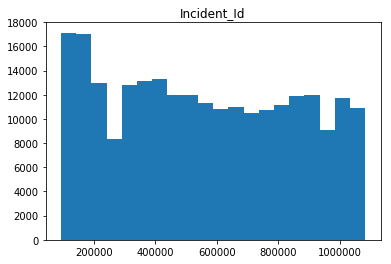

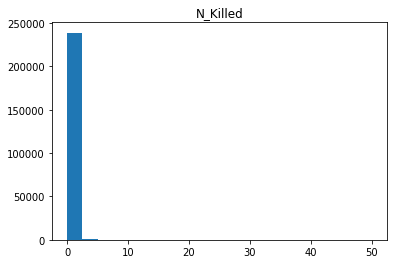

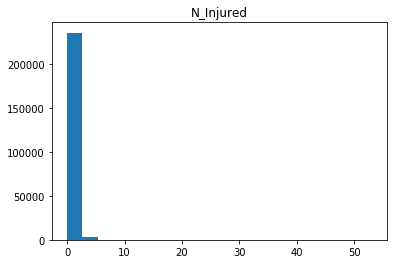

Numeric Columns to Drop: ['incident_id', 'n_killed', 'n_injured']


In [4]:
nums = []
for col in df.columns:
    if df[col].dtype == 'int64':
        nums.append(col)
        plt.hist(df[col], bins=20)
        plt.title(col.title())
        plt.show()
print("Numeric Columns to Drop: {}".format(nums))

### Thoughts on Numeric Data:
- `n_killed` and `n_injured` are extremely skewed
- `incident_id` is unlikely to be helpful since it is random numbers for each event

In [5]:
df1 = df.drop(columns=nums)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 26 columns):
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                      231754 non-null float64
n_guns_involved                140226 non-null float64
notes                          158660 non-null object
participant_age         

In [6]:
for col in df1.columns:
    if df[col].dtype == 'bool':
        print(col)

incident_url_fields_missing


In [7]:
df.incident_url_fields_missing.value_counts()

False    239677
Name: incident_url_fields_missing, dtype: int64

### Thoughts on Bools:
- `incident_url_fields_missing` can be dropped since they are all listed as `False`

In [8]:
df2 = df1.drop(columns='incident_url_fields_missing')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
date                        239677 non-null object
state                       239677 non-null object
city_or_county              239677 non-null object
address                     223180 non-null object
incident_url                239677 non-null object
source_url                  239209 non-null object
congressional_district      227733 non-null float64
gun_stolen                  140179 non-null object
gun_type                    140226 non-null object
incident_characteristics    239351 non-null object
latitude                    231754 non-null float64
location_description        42089 non-null object
longitude                   231754 non-null float64
n_guns_involved             140226 non-null float64
notes                       158660 non-null object
participant_age             147379 non-null object
participant_age_group       197558 non-null object
participant_gender 

/Users/steeznation/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/steeznation/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


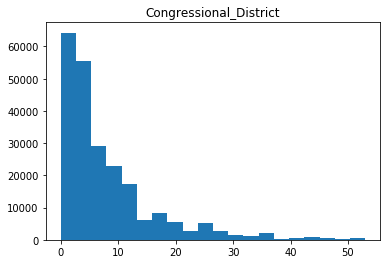

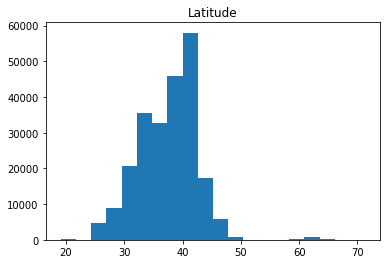

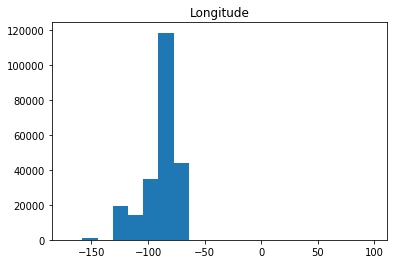

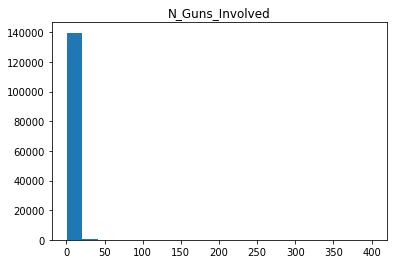

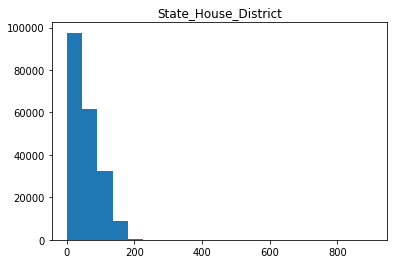

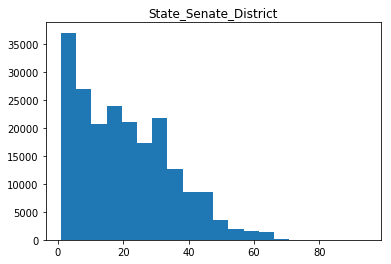

Float columns are: ['congressional_district', 'latitude', 'longitude', 'n_guns_involved', 'state_house_district', 'state_senate_district']


In [9]:
floats = []
for col in df2.columns:
    if df2[col].dtype == 'float64':
        floats.append(col)
        plt.hist(df2[col], bins=20)
        plt.title(col.title())
        plt.show()
print("Float columns are: {}".format(floats))

### Thoughts on Float Values:
- `congressional_district` will be hit or miss on its usefulness
- `latitude` and `longitude` will be useful for mapping purposes later with folium
- `n_guns_involved` is skewed and will likely not be of much use
- `state_house_district` and `state_senate_district` are both somewhat skewed but similar to `congressional_district` in that it remains to be seen on how useful they will be

In [10]:
df3 = df2.drop(columns=floats)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 19 columns):
date                        239677 non-null object
state                       239677 non-null object
city_or_county              239677 non-null object
address                     223180 non-null object
incident_url                239677 non-null object
source_url                  239209 non-null object
gun_stolen                  140179 non-null object
gun_type                    140226 non-null object
incident_characteristics    239351 non-null object
location_description        42089 non-null object
notes                       158660 non-null object
participant_age             147379 non-null object
participant_age_group       197558 non-null object
participant_gender          203315 non-null object
participant_name            117424 non-null object
participant_relationship    15774 non-null object
participant_status          212051 non-null object
participant_type        

In [11]:
lots = []
less = []
for col in df3.columns:
    if df[col].nunique() >= 6:
        print("{} has more than 6 unique values - {} to be specific".format(col.title(), df[col].nunique()))
        lots.append(col)
        print()
    else:
        print("{}:".format(col.title()))
        print(df[col].value_counts())
        print()

Date has more than 6 unique values - 1725 to be specific

State has more than 6 unique values - 51 to be specific

City_Or_County has more than 6 unique values - 12898 to be specific

Address has more than 6 unique values - 198037 to be specific

Incident_Url has more than 6 unique values - 239677 to be specific

Source_Url has more than 6 unique values - 213989 to be specific

Gun_Stolen has more than 6 unique values - 349 to be specific

Gun_Type has more than 6 unique values - 2502 to be specific

Incident_Characteristics has more than 6 unique values - 18126 to be specific

Location_Description has more than 6 unique values - 27595 to be specific

Notes has more than 6 unique values - 136652 to be specific

Participant_Age has more than 6 unique values - 18951 to be specific

Participant_Age_Group has more than 6 unique values - 898 to be specific

Participant_Gender has more than 6 unique values - 873 to be specific

Participant_Name has more than 6 unique values - 113488 to be sp

In [12]:
df3.isna().sum()

date                             0
state                            0
city_or_county                   0
address                      16497
incident_url                     0
source_url                     468
gun_stolen                   99498
gun_type                     99451
incident_characteristics       326
location_description        197588
notes                        81017
participant_age              92298
participant_age_group        42119
participant_gender           36362
participant_name            122253
participant_relationship    223903
participant_status           27626
participant_type             24863
sources                        609
dtype: int64

### Thoughts on Text Values:
- Null values for:
    - `address` (16,497)
    - `source_url` (468)
    - `gun_stolen` (99,498)
    - `gun_type` (99,451)
    - `incident_characteristics` (326)
    - `location_description` (197,588)
    - `notes` (81,017)
    - `participant_age` (92,298)
    - `participant_age_group` (42,119)
    - `participant_gender` (36,362)
    - `participant_name` (122,253)
    - `participant_relationship` (223,903)
    - `participant_status` (27,626)
    - `participant_type` (24,863)
    - `sources` (609)

In [13]:
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,239677
Total Missing (%),18.2%
Total size in memory,51.4 MiB
Average record size in memory,225.0 B
Numeric,9
Categorical,18
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [14]:
df.isna().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [15]:
percent = round(100*(df['address'].isna().sum() / len(df)), 3)
percent

6.883

In [16]:
drops = []
for col in df.columns:
    percent = round(100*(df[col].isna().sum() / len(df)), 3)    
    if percent > 10:
        drops.append(col)
    elif percent == 0:
        pass
    else:
        print(col.title(), "has {} percent null values from {} nulls.".format(percent, df[col].isna().sum()))
        print()
dropped_df = df.drop(columns=drops)
print('*'*75)
print()
print("Remaining Columns Null Values:")
dropped_df.isna().sum()

Address has 6.883 percent null values from 16497 nulls.

Source_Url has 0.195 percent null values from 468 nulls.

Congressional_District has 4.983 percent null values from 11944 nulls.

Incident_Characteristics has 0.136 percent null values from 326 nulls.

Latitude has 3.306 percent null values from 7923 nulls.

Longitude has 3.306 percent null values from 7923 nulls.

Sources has 0.254 percent null values from 609 nulls.

***************************************************************************

Remaining Columns Null Values:


incident_id                        0
date                               0
state                              0
city_or_county                     0
address                        16497
n_killed                           0
n_injured                          0
incident_url                       0
source_url                       468
incident_url_fields_missing        0
congressional_district         11944
incident_characteristics         326
latitude                        7923
longitude                       7923
sources                          609
dtype: int64

- Drop the `address` column null values (16,497)
- Drop the `source_url` column null values (468)
- Not sure about `congressional_district` column
- `incident_characteristics` might not be useful
- `latitude` and `longitude` will be helpful for plotting, can probably drop nulls
- `sources` are probably unimportant

In [17]:
dropped_df.dropna()
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 15 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
longitude                      231754 non-null float64
sources                        239068 non-null object
dtypes: bool(1), float64(3), int64(3), object(8)
memory usage: 25.8+ MB


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [49]:
guns = df[['latitude', 'longitude', 'n_injured', 'n_killed']]
locations = guns[['latitude', 'longitude']]
locations = locations.dropna()
locationlist = locations.values.tolist()
print(len(locationlist))
locationlist[:5]

231754


[[40.3467, -79.8559],
 [33.909, -118.333],
 [41.4455, -82.1377],
 [39.6518, -104.802],
 [36.114000000000004, -79.9569]]

# Plot on Map with Folium

In [58]:
if not os.path.exists('Visualizations/gun_map1.html'):
    map_1 = folium.Map(location=[df.latitude.median(), df.longitude.median()], zoom_start = 4)
    plugins.FastMarkerCluster(locationlist).add_to(map_1)
    plugins.ScrollZoomToggler().add_to(map_1)
    map_1.save(os.path.join('Visualizations/', 'gun_map1.html'))
else:
    print("Gun Map 1 Exists, Check the Project Directory")

Gun Map 1 Exists, Check the Project Directory


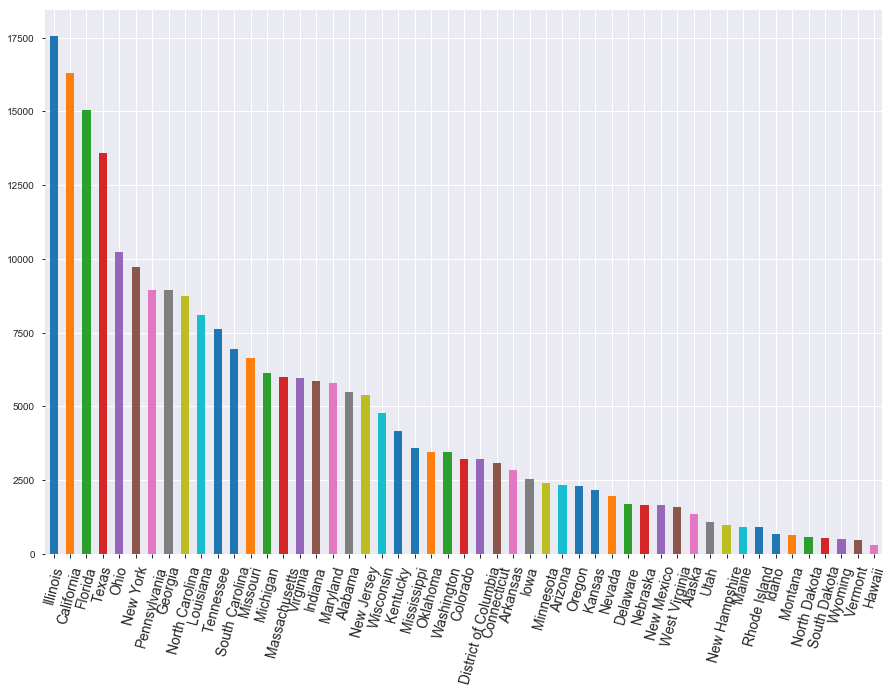

In [72]:
plt.figure(figsize=(15, 10))
df.state.value_counts().plot(kind='bar')
plt.xticks(fontsize=14, rotation=75)
plt.show()